# Preface

Hello,

My name is Mats De Clercq and this Jupyter notebook was made with the goal to explain the workflow of analyzing proteotypicity predictor scores. The reason I'm doing this is because it is part of my Master thesis and my research group (Compomics located in Ghent) would like to use these results to aid the current metaproteomics identification (and further down the line quantification) problem. There will be some references in this notebook and I will try to make everything that I used here available on github. This will not be a detailed explanation of the current hurdles surrounding metaproteomics analysis but I hope you can gain some insight in the code, making it possible to start looking deeper into this interesting field yourself.

Kind regards,

Mats

## Useful references to get you started

1) Muth T, Renard BY, Martens L (2016) Metaproteomic data analysis at a glance: advances in computational microbial community proteomics. Expert Rev Proteomics 13: 757–769.

2) Blackburn JM, Martens L (2016) The challenge of metaproteomic analysis in human samples. Expert Rev Proteomics 13: 135-138

## Gathering the data

The three preoteotypicity predictors that we use are CP-DT (in-house) [1] , DeepMSPeptide [2] and AP3 [3]. The database containing all the reference proteomes present in the SIHUMIx sample [4] will be used as a reference metaproteomics database.

1) Fannes T, Vandermarliere E, Schietgat L, Degroeve S, Martens L, Ramon J (2013) Predicting tryptic cleavage from proteomics data using decision tree ensembles. J Proteome Res 12: 2253–2259.

2) Serrano G, Guruceaga E, Segura V (2019) DeepMSPeptide: peptide detectability prediction using deep learning. Bioinformatics.

3) Gao Z, Chang C, Yang J, Zhu Y, Fu Y (2019) AP3: An Advanced Proteotypic Peptide Predictor for Targeted Proteomics by Incorporating Peptide Digestibility. Anal Chem.

4) Schäpe SS, Krause JL, Engelmann B, Fritz-Wallace K, Schattenberg F, Liu Z, Müller S, Jehmlich N, Rolle-Kampczyk U, Herberth G, et al. (2019) The simplified human intestinal microbiota (Sihumix) shows high structural and functional resistance against changing transit times in in vitro bioreactors. Microorganisms.

# CP-DT

For the CP-DT model a file is available in the directory 'CP-DT' on Github. This file should be used on a Linux platform ,it will not work using bash shell on a modern Windows because the file is quite old (I have problems because of the CPU architecture the original file is compiled in). Open the terminal and cd to the directory that contains CP-DT. Use the command 'cp-dt --help' to see the different paramaters you can adjust. 

Following is an example of how to use this:

*cp-dt --peptides --min-aa-number 6 --max-aa-number 30 --max-miscleavages 2 --fasta-file ./mats/SIHUMix.fasta  > ./mats/SIHUMIx.cpdt*

As you can see cp-dt takes fasta files and the output file will be 'SIHUMIx.cpdt'.

output example CP-DT:

MKRHVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSRIGVNRLFVETATQLIKDGYAVLCFDYVGCGESTGEYGRSGFDQLVAQTRHVLQEAAHFPEIDSQRISLL
GHSLGGPVALYTAISEPNIRKLMLWSPVAHPYKDIVRIVGVDTYQRAWQHTSVDYMGYGLTLAFFESLHSYVPLKELQKYTGDVFIAHGTADIDIPVEYCFHYYYAFRSRST
GKSDKEIILEADHTFSDGCSRTMLIDSTREWLSGERYYKQSGGAITRTIGYSI

PEPTIDE MKRHVEIK: 0.0183349

PEPTIDE RHVEIK: 0.0847898

PEPTIDE RHVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSR: 0.00917548

PEPTIDE HVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSR: 0.0854887

PEPTIDE HVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSRIGVNR: 0.0086859

# DeepMSPeptide

Download DeepMSPeptide here: https://github.com/vsegurar/DeepMSPeptide.

In the directory 'DeepMSPeptide' you will find a python script. To use this script you need to have Python 3.6.5 or above (stick to Python 3.6.5 because it will give problems in python 3.7.x or python 3.8.x) and Tensorflow 1.13.1 (don't use the newest version of TensorFlow stick with 1.13.1 but 2.0.0 worked for me). DeepMSPeptide only takes peptides as input so you can't use fasta files here. I used the peptides retrieved from the in silico cleavage of CP-DT and a script in the directory 
'DeepMSPeptide' to get these peptides will be available on github.

Example command line:

*python DeepMSPeptide.py path/to/Peptide_list_SIHUMIx.txt*

A file called Peptide_list_SIHUMIX_Predictions.txt will be made in the same directory as the Peptide list.

Output example DeepMSPeptide:

Peptide	Prob	Detectability

AAAAAAAAAAAAAAASSAGGAASTSAATAPATVPAYAGK	0.964686364	1

AAAAAAAAAAAAAAASSAGGAASTSAATAPATVPAYAGKK	0.91497517	1

AAAAAAAAAAAAAAASSAGGAASTSAATAPATVPAYAGKKPK	0.8730849	1

AAAAAAAAAAAANGAGSGAVTPTAAAR	0.84135649	1

AAAAAAAAAAAANGAGSGAVTPTAAAREGK	0.1436054	0

AAAAAAAAAAAANGAGSGAVTPTAAAREGKIGR	0.10965574	0

AAAAAAAAAAAGLATLPGQLIICAA	0.0040765	0

AAAAAAAAAAEQQK	0.78591686	1

AAAAAAAAAAEQQKR	0.82756782	1

AAAAAAAAAAEQQKRLER	0.00558627	0

AAAAAAAAGSNDMLEPELGR	0.83438534	1

AAAAAAAAGSNDMLEPELGRSSPVDLSTK	0.0653287	0

AAAAAAAAK	0.00071234	0

AAAAAAAAKAK	0.0001681	0

AAAAAAAAKAKNNK	5.394e-05	0



# AP3

Click on this link to download AP3: http://fugroup.amss.ac.cn/software/AP3/AP3.html. 

On the web page a user guide is available which you should follow because certain software needs to be installed. This predictor gave us a lot of problems because it can't handle the SIHUMIx database in one go. So what we did is split the dataset so that each part contained 1000 proteins (except the last one). On github you will also find a script called 'makeparamfiles.py' this script automates the whole process of making a parameter file for each slice of the database while also running the AP3.exe in terminal. The results of AP3 contain 5 text files with the most important one being 'DetectabilitiesOfPeptides.txt'.

Output example AP3:

Peptide sequence        Protein id	      Peptide detectability

WQDETLAVTLYVPELENQAETFPLIVICHGFIGSR	B_lat_ID_00001	0.095

LFVETATQLIK	B_lat_ID_00001	0.79

DGYAVLCFDYVGCGESTGEYGR	B_lat_ID_00001	0.725

SGFDQLVAQTR	B_lat_ID_00001	0.95
 
HVLQEAAHFPEIDSQR	B_lat_ID_00001	0.905

ISLLGHSLGGPVALYTAISEPNIR	B_lat_ID_00001	0.85

LMLWSPVAHPYK	B_lat_ID_00001	0.745

IVGVDTYQR	B_lat_ID_00001	0.89

AWQHTSVDYMGYGLTLAFFESLHSYVPLK	B_lat_ID_00001	0.395

YTGDVFIAHGTADIDIPVEYCFHYYYAFR	B_lat_ID_00001	0.385 

## Combining all of the results in one JSON file

So to be able to compare and analyze the results from these different predictors I made a script that creates a JSON file based on the following dictionary structure.

{ Protein_ID : { Peptide : { Predictor : score } } }

So the dictionary will contain all peptides for each protein ID and also the different scores from the predictors for each peptide. A python script called 'predictor_output_to_JSON.py' will be available on github with extra explanation inbetween the code. Adding the DeepMSPeptide results takes quite a long time (based on how large your dataset is) so beware.

# Data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import json
import statistics

## First of all we open our json file and we make a dataframe from this data

In [3]:
with open('E:/Mats/CP-DT/proteotypicity_scores_SIHUMIx.txt', 'r') as file:
    data = json.load(file)

column_values = []
rows = []
for key in data:
    for key2 in data[key]:
        rows.append(key)
        rows.append(key2)
        try: 
            rows.append(float(data[key][key2]['CP-DT']))
        except ValueError:
            rows.append(np.nan)
        try:
            rows.append(float(data[key][key2]['DeepMSPeptide']))
        except ValueError:
            rows.append(np.nan)
        try: 
            rows.append(float(data[key][key2]['AP3']))
        except ValueError:
            rows.append(np.nan)
        
        column_values.append(rows)
        rows = []
                
        

column_names = ['Protein ID', 'Peptide', 'CP-DT score', 'DeepMS score', 'AP3 score']
df_database =  pd.DataFrame(column_values, columns = column_names) 
#del data
file.close()
df_database.head()

,Protein ID,Peptide,CP-DT score,DeepMS score,AP3 score
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,0.005453,0.001761,0.01500
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,0.049798,0.042643,0.43000
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,0.007944,0.000029,0.17250
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,0.125439,0.011918,0.56125
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,0.018249,0.121393,0.10500


## Adding columns containing the differences between the score for all three predictors

In [4]:
df_database['Difference CP-DT & AP3'] = abs(df_database['CP-DT score'] - df_database['AP3 score'])
df_database['Difference CP-DT & DeepMSPeptide'] = abs(df_database['CP-DT score'] - df_database['DeepMS score'])
df_database['Difference AP3 & DeepMSPeptide'] = abs(df_database['AP3 score'] - df_database['DeepMS score'])
#df_database_difscore = df_database.melt(id_vars = ['Peptide'], value_vars = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'])

df_database.head()

,Protein ID,Peptide,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


## Adding a 'length' column 

In [43]:
lengths = []
groter_30 = 0
kleiner_8 = 0
#database
for peptide in df_database['Peptide']:
    if 8 <= len(peptide) <= 10:
        lengths.append('08-10 AA')
    elif 10 < len(peptide) <= 13:
        lengths.append('11-13 AA')
    elif 13 < len(peptide) <= 16:
        lengths.append('14-16 AA')
    elif 16 < len(peptide) <= 19:
        lengths.append('17-19 AA')
    elif 19 < len(peptide) <= 22:
        lengths.append('20-22 AA')
    elif 22 < len(peptide) <= 25:
        lengths.append('23-25 AA')
    elif 25 < len(peptide) <= 28:
        lengths.append('26-28 AA')
    elif 28 < len(peptide) <= 30:
        lengths.append('28-30 AA')
    if len(peptide) > 30:
        lengths.append(0)
    if len(peptide) < 8:
        lengths.append(0)


df_database.insert(2, 'length', lengths)

df_database.head()


,Protein ID,Peptide,length,Hydrophobicity,Missed Cleavages,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,11-13 AA,-16.8,2,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,11-13 AA,-14.2,1,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,14-16 AA,-28.6,2,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,08-10 AA,-15.0,1,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,11-13 AA,-19.5,2,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


In [42]:
del df_database['length']
df_database.head()


,Protein ID,Peptide,Hydrophobicity,Missed Cleavages,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,-16.8,2,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,-14.2,1,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,-28.6,2,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,-15.0,1,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,-19.5,2,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


## Adding a 'Missed cleavages' column

In [7]:
missed_cleavage = 0
mc_list = []

for peptide in df_database['Peptide']:
    for index, character in enumerate(peptide):
        if index == len(peptide) - 1:
            pass
        
        elif character == 'R':
            missed_cleavage += 1
        elif character == 'K':
            missed_cleavage += 1
            
    mc_list.append(missed_cleavage)
    missed_cleavage = 0
    
#del df_database['Missed Cleavages']
df_database.insert(2, 'Missed Cleavages', mc_list)
df_database.head()

,Protein ID,Peptide,Missed Cleavages,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,2,11-13 AA,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,1,11-13 AA,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,2,14-16 AA,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,1,8-10 AA,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,2,11-13 AA,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


## Adding a 'Hydrophobicity' column 

In [8]:
#Kyte-Doolittle scale is an old scale but widely used and a positive value means hydrophobic 
hydro_dict = {'A': 1.800, 'R' : -4.500, 'N' : -3.500, 'D' : -3.500, 'C': 2.500, 
'E' : -3.500,'Q' : -3.500, 'G' : -0.400, 'H' : -3.200,'I' : 4.500,
'L' : 3.800,'K' : -3.900,'M' : 1.900,'F' : 2.800,'P' : -1.600,
'S' : -0.800  ,'T' : -0.700,'W' : -0.900,'Y' : -1.300,'V' : 4.200}

Hydrophobicity = 0
Hydro_list = []
for peptide in df_database['Peptide']:
    for character in peptide:
        if character in hydro_dict:
            Hydrophobicity += hydro_dict[character]
    
    Hydro_list.append(Hydrophobicity)
    Hydrophobicity = 0

df_database.insert(2, 'Hydrophobicity', Hydro_list)
df_database.head()

,Protein ID,Peptide,Hydrophobicity,Missed Cleavages,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,-16.8,2,11-13 AA,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,-14.2,1,11-13 AA,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,-28.6,2,14-16 AA,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,-15.0,1,8-10 AA,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,-19.5,2,11-13 AA,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


## Making a dataframe of all the scores for the identified peptides using SearchGUI/Peptideshaker

In [51]:
proteom_analysis = pd.read_excel('E:\Mats\SearchGUI_results\PSM_SIHUMIx.xls')
iden_pept = list(proteom_analysis['Sequence'])
ip_in_db = []
no_id = set()


for index, seq in enumerate(df_database_AA_8_30['Peptide']):
    if seq in iden_pept:
        ip_in_db.append(True)
        
    else:
        ip_in_db.append(False)
        
    
df_idenpep = df_database_AA_8_30[ip_in_db]
print(len(iden_pept), df_idenpep.shape)

17836 (13364, 11)


In [52]:
print(len(set(iden_pept)))
print(len(set(df_idenpep.Peptide)))

12906
12756


In [20]:
test = []
for seq in set(iden_pept):
    if seq not in set(df_idenpep.Peptide):
        print(seq)
        test.append(seq)

print(len(test))

DSGRADDNEETIKKR
KKEEEAQKPSIVAAAGPLVIGQGGK
VREGDDLLNADRGSKER
EMAENKYGKEEAAKR
LASKPEAEKIEAKPEAK
EGVSKDDAEALKKALEEAGAEVEVK
VMPYFDFVVPTELPGVD
AKELADKYKQ
IVKDAGMDILGAAFKELPDDLKK
IRRDDEVIVLTGKDK
DPIADYLTR
ALGCLGSRSLCNVGFGRPRVASR
LLKDKEAEIDRR
ALIEAELEQQKKEIIGKLEK
VYGGEADAADKAEAANKKEK
YTPSEDQDKKEGKR
EGLDALVPIASD
IKEENFLKDVNVLSDLKLR
AQSNITPESIVGDLR
KFMASIEAALEKGDVEAAKDIAR
FGFVVRPDANKLEIKK
KYHPDVNPGDKEAEKK
ATLKPEGQAALDQLYSQLSNLD
EANRLGIPVFGIVDTNSD
MKAEAEANAEADKKER
GKDSGRADDNEETIKK
KKMPIGVMVTLRR
APYETYLGGLDRQEIINLKDLNEKLGR
PQIPVFTEGTDK
EGGFVPRLVVVFNIGKSNISKR
TMDNNTISSTHQEK
VLKDLPETDKYRQEYIDR
EAAEFENQDKKRK
VGDTVEVYIENQEDKKGQLVLSHRK
EDNTRTDFDWVDRRDLTK
LLDQGEAGDNVGLLLRGVDKNEIKR
VTDKDIQINIFEVKRPELDAVIVANNIAR
SKYGVKRPKA
FKAEVYILKKEEGGR
SDLENKKAEEAPKK
KGDIDGAVKFFDEAIQLETDNVKK
IDLNRPMAEILKELTKYPVSTR
KFFEGNPQDNYPDSLDKYRK
EKKDRVDDALR
AEAEKNIRIEQANTEKESR
EKPKTFGNLDLDDIEKR
KAEKIDMEAAGEAPANKGK
TKKEDEIVAKEK
ANEELKEVKFEYKTN
GKPADGRGNTGSTDGIRTGGDAGNER
TDRSDRPEEDVKIVK
RRETEHQLEEVGAELRK
ILDPRDTYECACQWEEKAKDLAGR
A

## Taking subset of database containing only peptides with length 8-30 AA

In [48]:
df_database_AA_8_30 = df_database[df_database.length != 0]

print(df_database.shape, df_database_AA_8_30.shape)

(1760954, 11) (1760947, 11)


## Distribution of predictor scores for both database and identified peptides

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED0220EC8>,
      dtype=object)

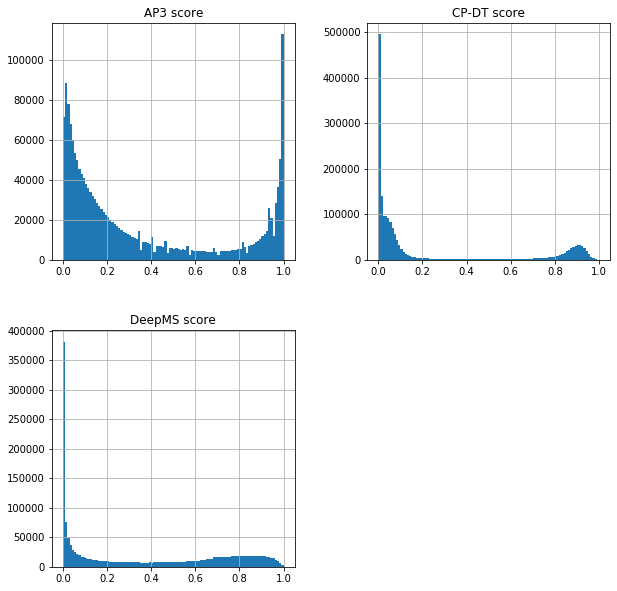

In [49]:
df_database_AA_8_30.hist(column = ['AP3 score', 'CP-DT score', 'DeepMS score'], bins = 100, figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EE86DEFC8>,
      dtype=object)

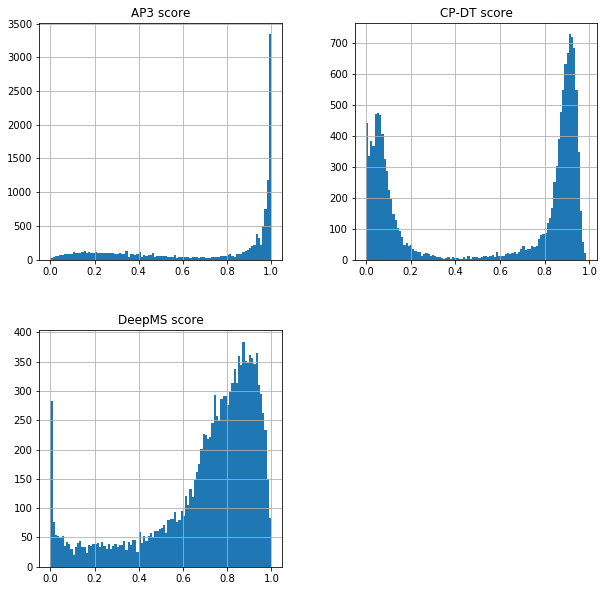

In [22]:
df_idenpep.hist(column = ['AP3 score', 'CP-DT score', 'DeepMS score'], bins = 100, figsize = (10,10))

## Difference in score based on length

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED3A9D808>,
      dtype=object)

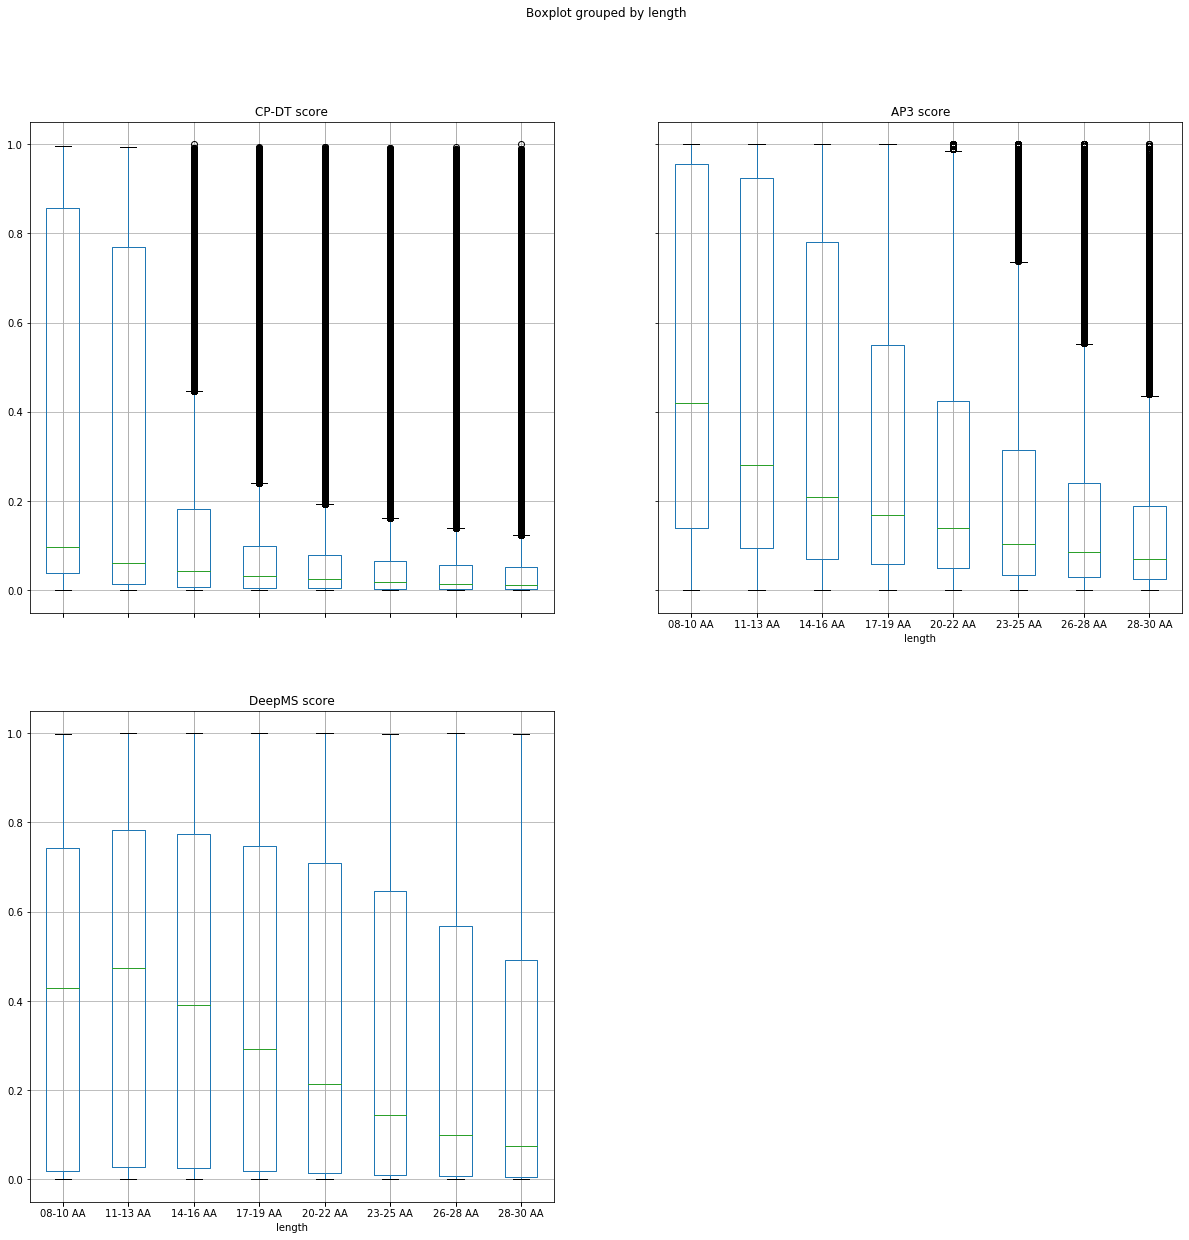

In [50]:
df_database_AA_8_30.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'length', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EE10D0848>,
      dtype=object)

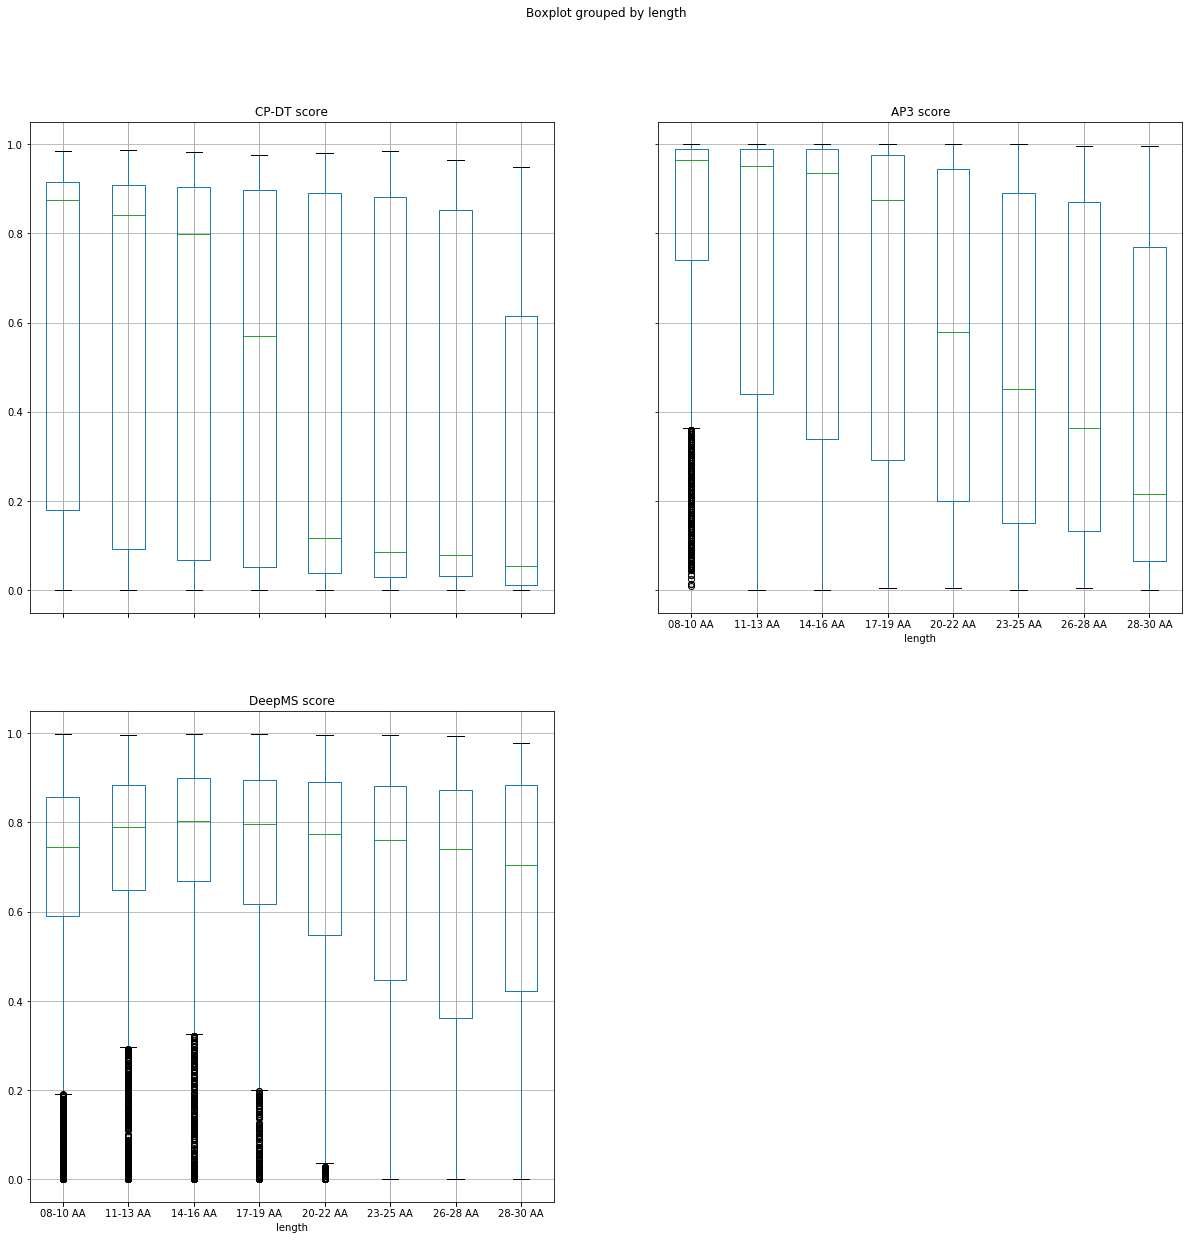

In [53]:
df_idenpep.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'length', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED9E38BC8>,
      dtype=object)

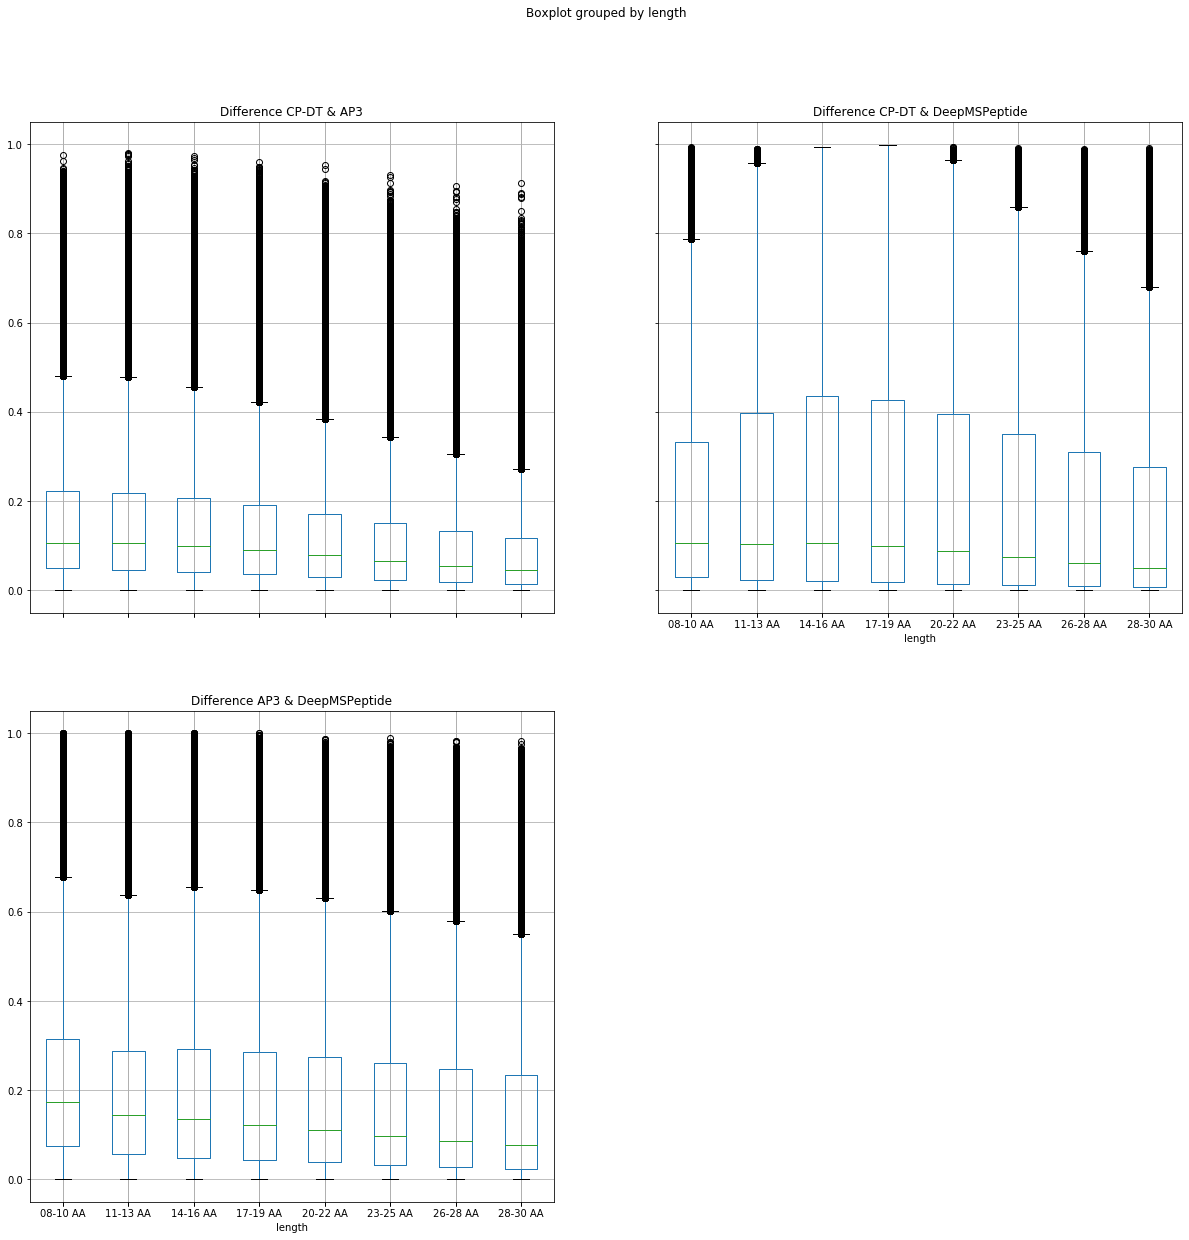

In [54]:
df_database_AA_8_30.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'length', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED6E6CF48>,
      dtype=object)

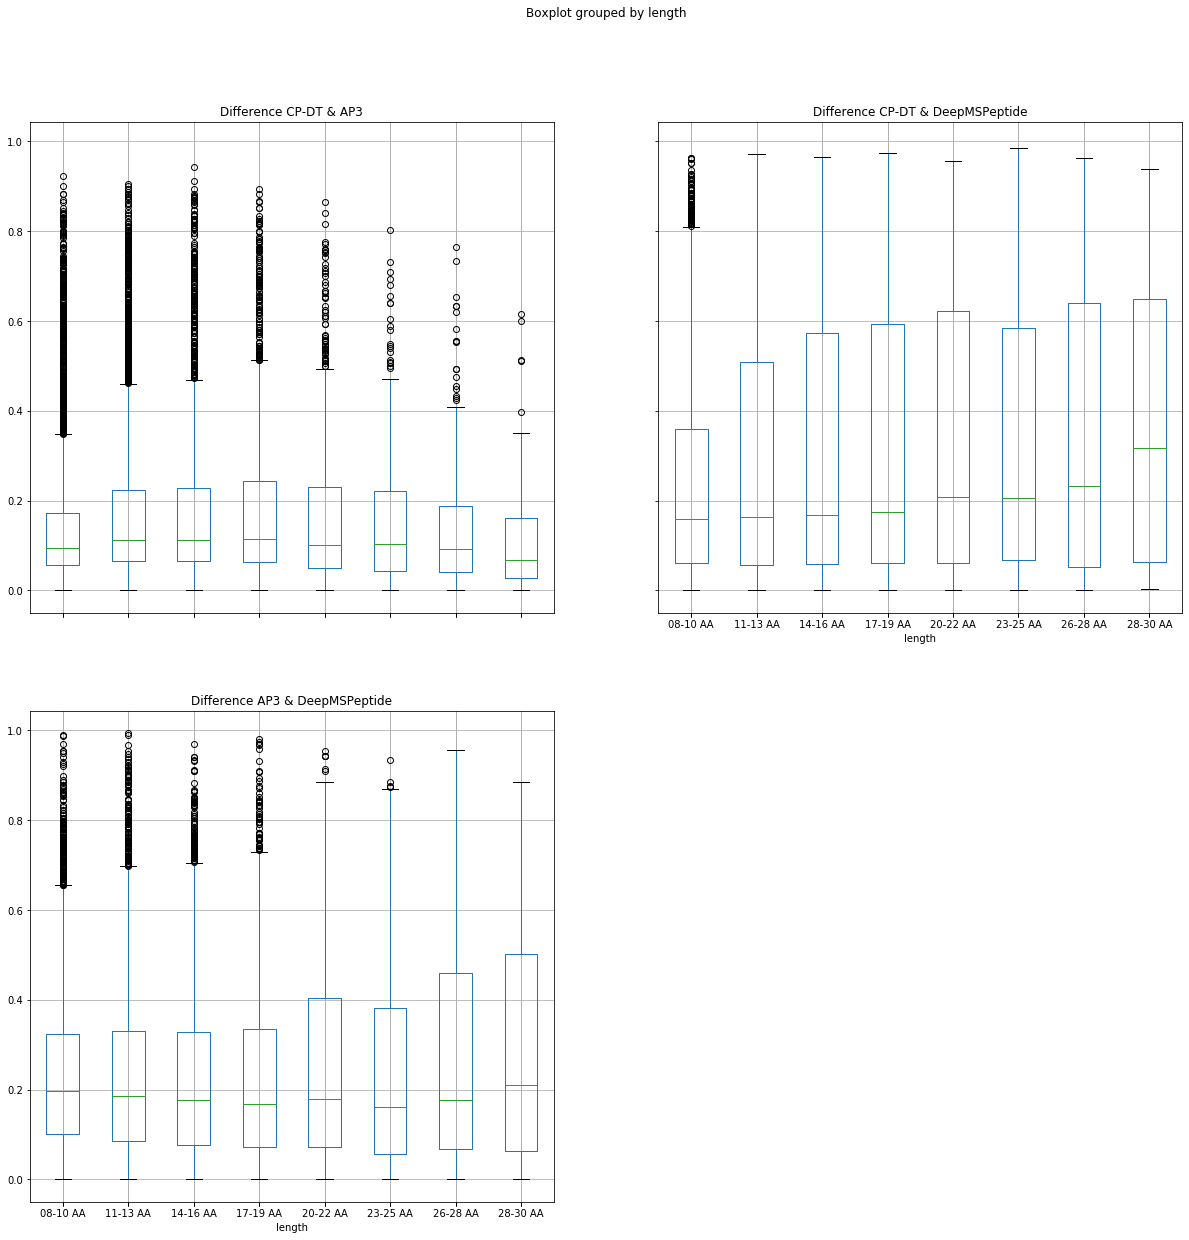

In [55]:
df_idenpep.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'length', figsize = (20,20))

## Difference in score based on miscleavage

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EE0A29EC8>,
      dtype=object)

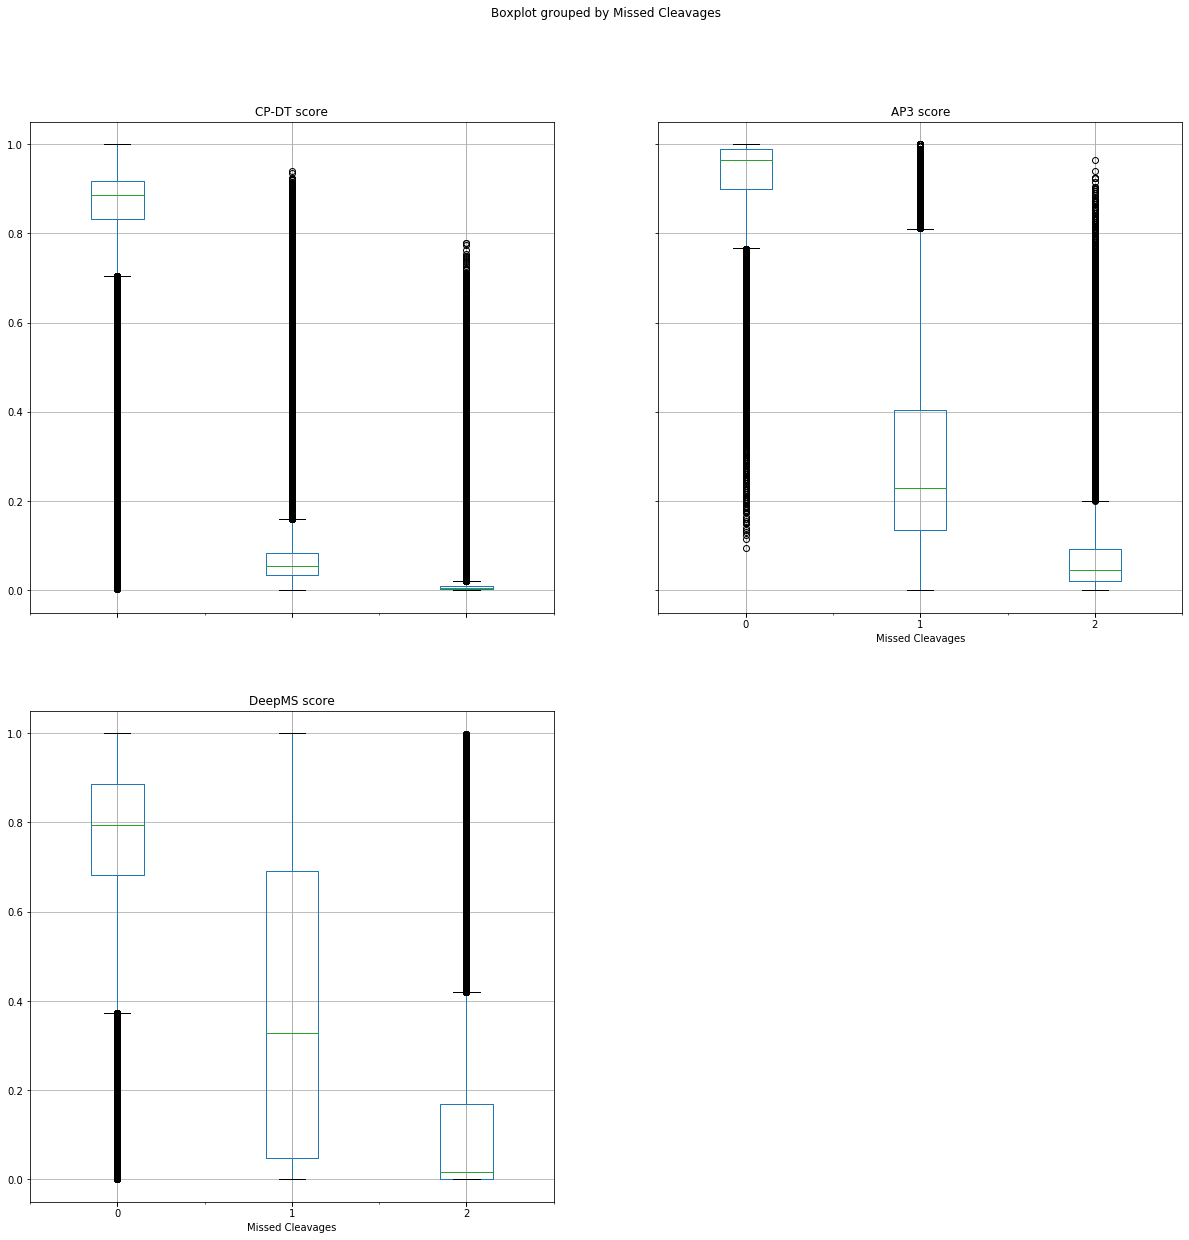

In [29]:
df_database_AA_8_30.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Missed Cleavages', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EE0504948>,
      dtype=object)

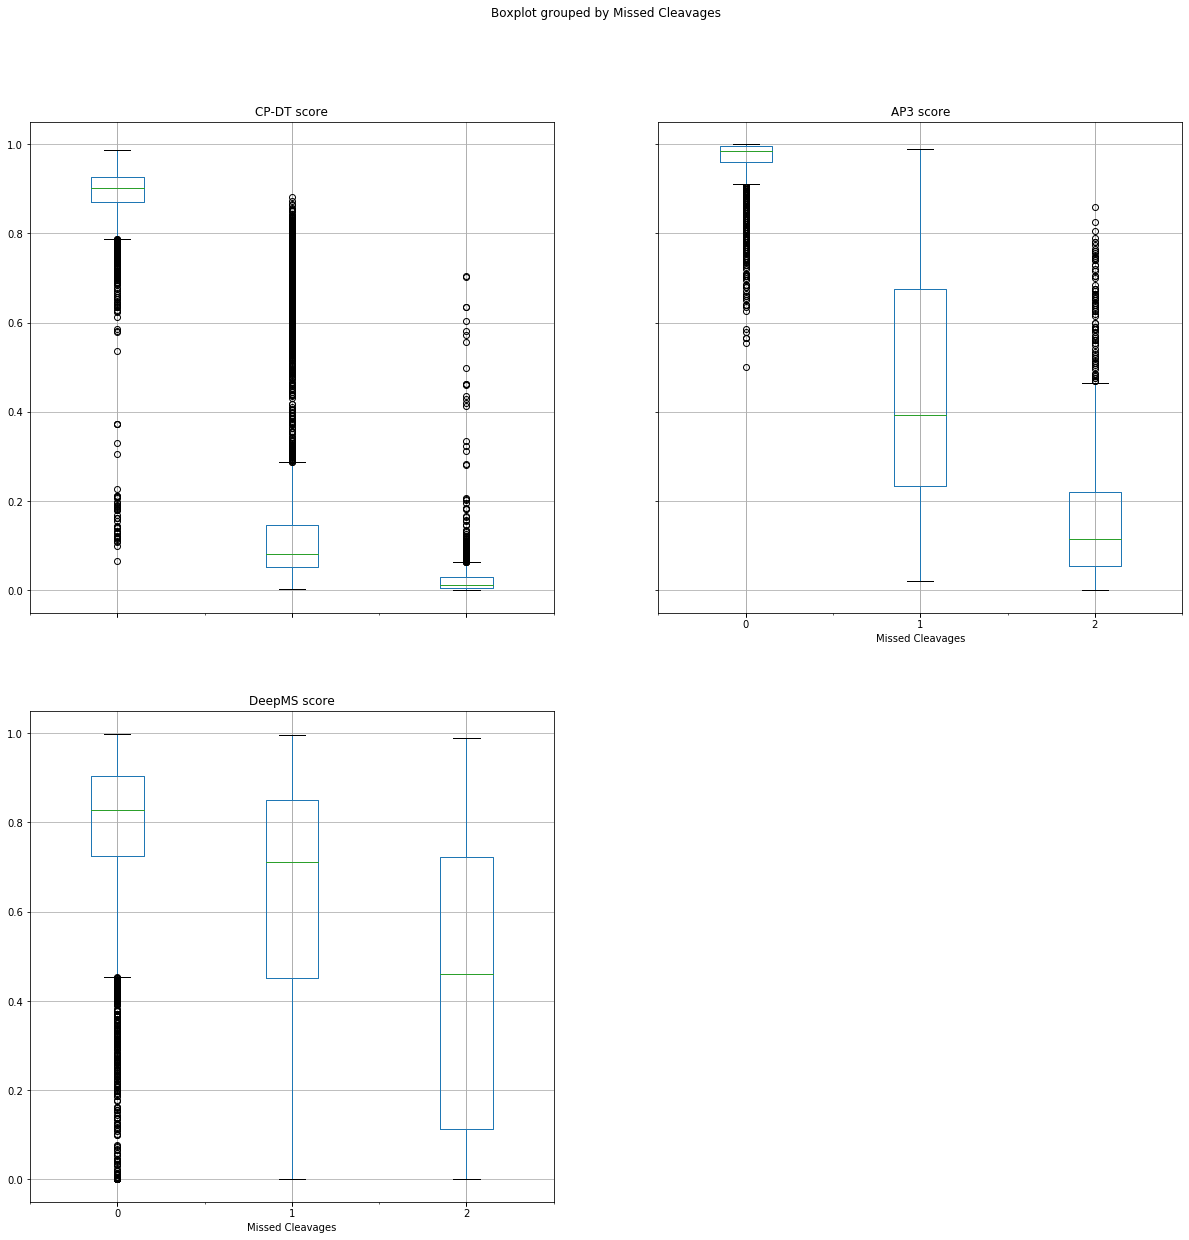

In [30]:
df_idenpep.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Missed Cleavages', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED0735388>,
      dtype=object)

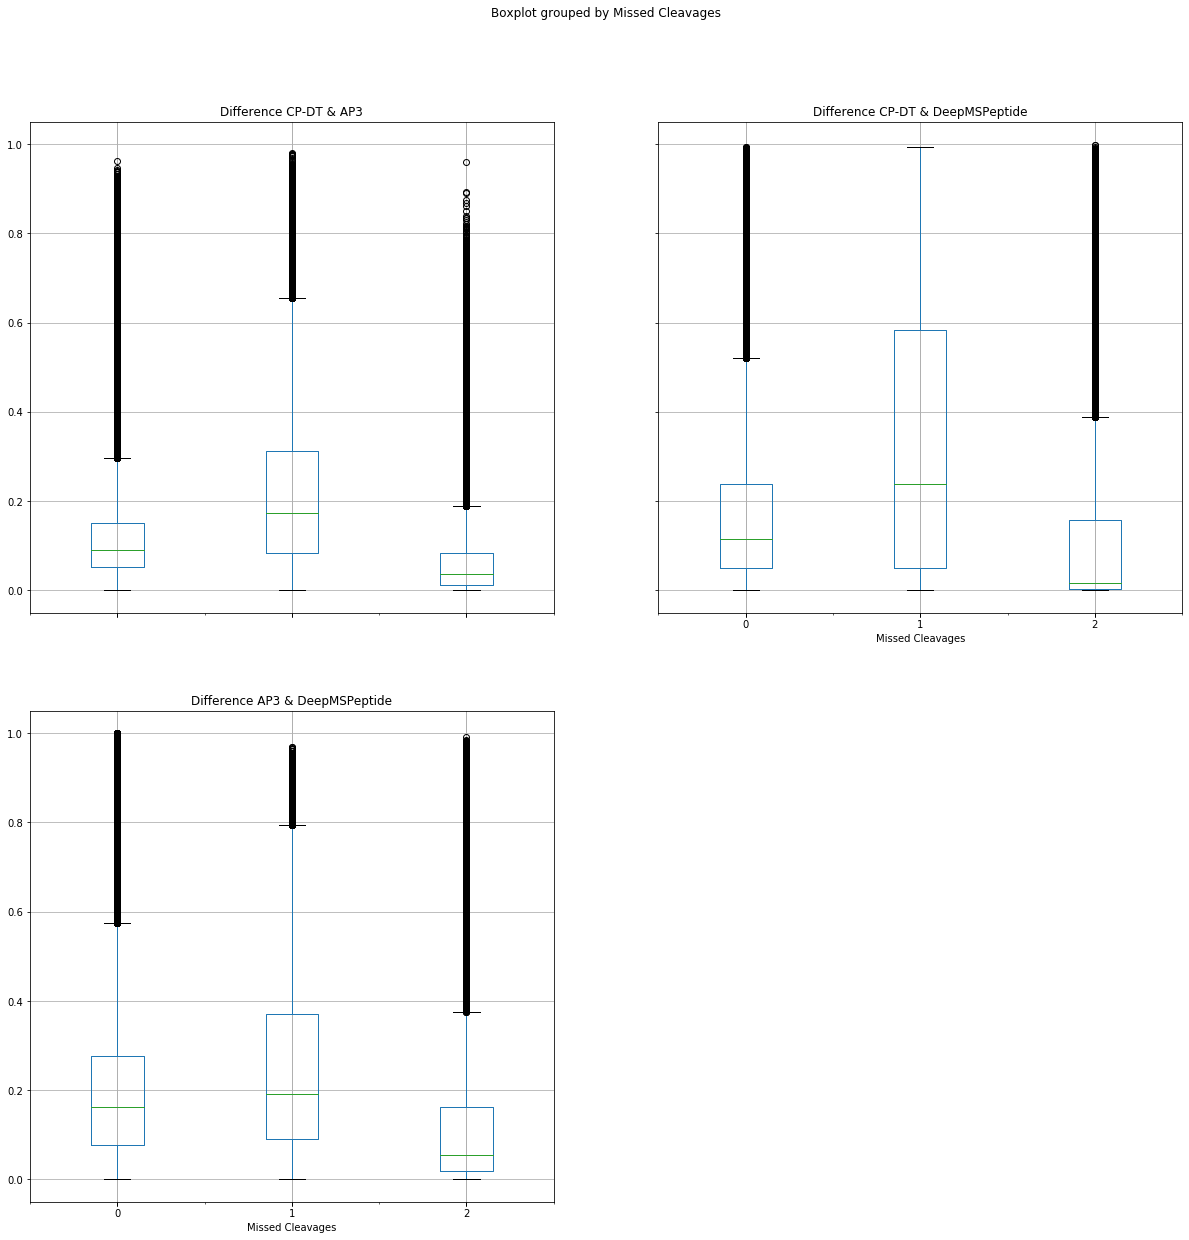

In [31]:
df_database_AA_8_30.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Missed Cleavages', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED50A6A08>,
      dtype=object)

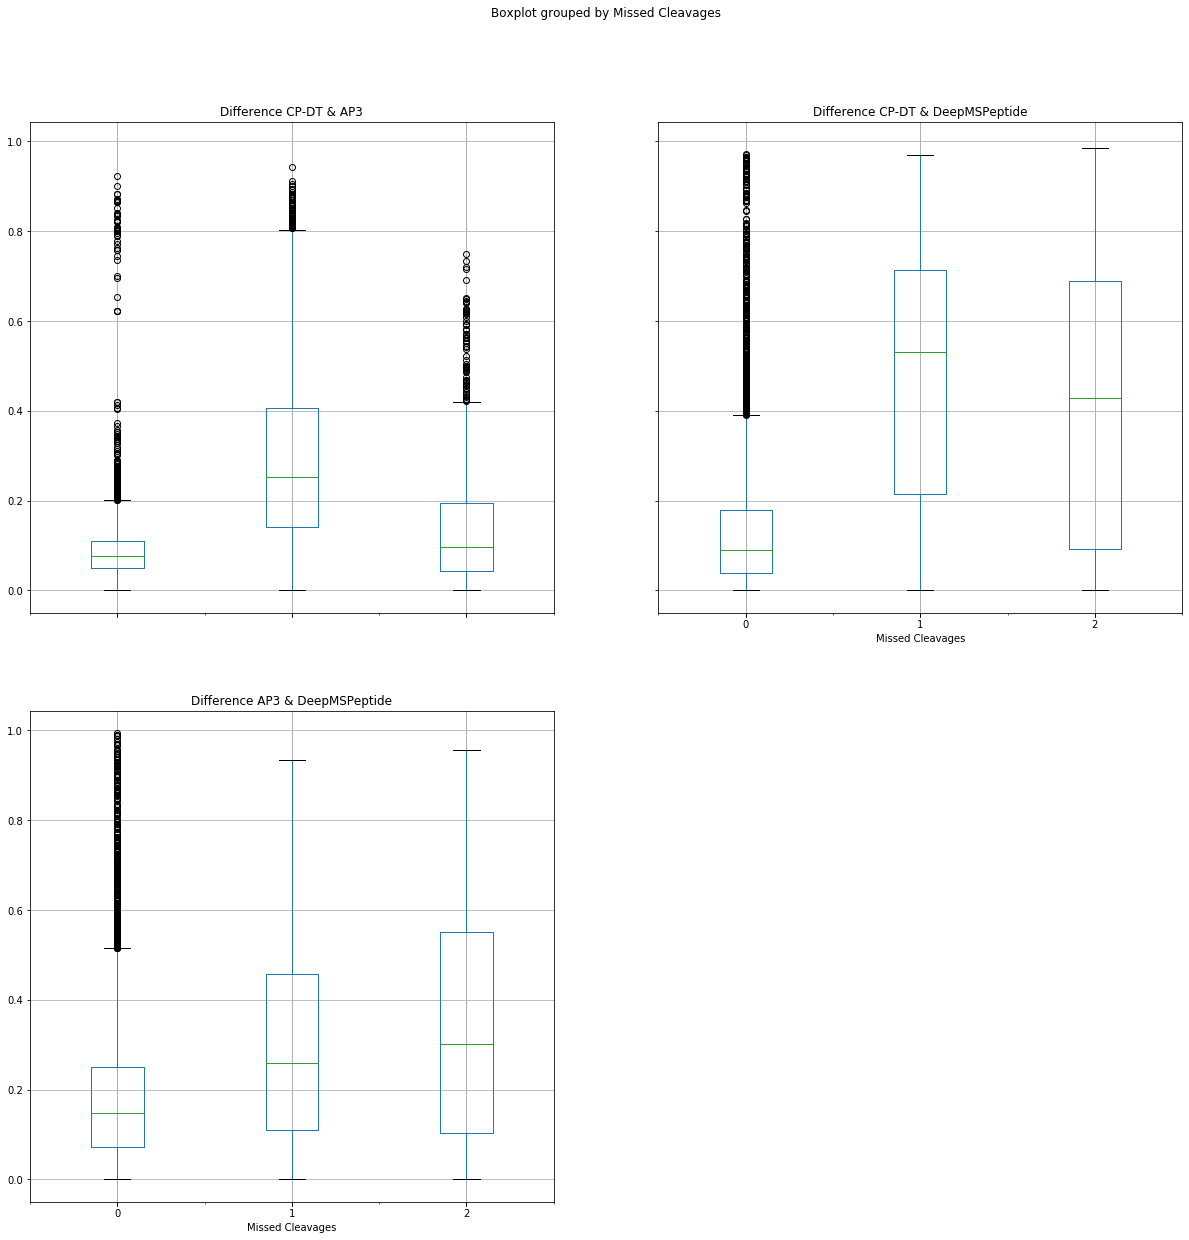

In [32]:
df_idenpep.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Missed Cleavages', figsize = (20,20))

## Difference in score based on Hydrophobicity

In [33]:
hydro_dblist = []
for hydro in df_database_AA_8_30.Hydrophobicity:
    if hydro > 0:
        hydro_dblist.append('Hydrophobic')
    else:
        hydro_dblist.append('Hydrophilic')

hydro_iplist = []    
for hydro in df_idenpep.Hydrophobicity:
    if hydro > 0:
        hydro_iplist.append('Hydrophobic')
    else:
        hydro_iplist.append('Hydrophilic')
        
df_database_AA_8_30.insert(2, 'Hydrophobic/Hydrophilic', hydro_dblist)
df_idenpep.insert(2, 'Hydrophobic/Hydrophilic', hydro_iplist)

df_idenpep.head()

,Protein ID,Peptide,Hydrophobic/Hydrophilic,Hydrophobicity,Missed Cleavages,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
249,tr|B0MG03|B0MG03_9FIRM,NLLVDFSEDR,Hydrophilic,-4.7,0,8-10 AA,0.867793,0.881931,0.985,0.117207,0.014138,0.103069
602,tr|B0MHE9|B0MHE9_9FIRM,VLDGAIGVFDAKGGVEPQSENVWR,Hydrophilic,-2.8,1,23-25 AA,0.026215,0.995823,0.120,0.093785,0.969608,0.875823
603,tr|B0MHE9|B0MHE9_9FIRM,GGVEPQSENVWR,Hydrophilic,-14.2,0,11-13 AA,0.950694,0.927834,0.995,0.044306,0.022860,0.067166
606,tr|B0MHE9|B0MHE9_9FIRM,QADTYDVPR,Hydrophilic,-12.6,0,8-10 AA,0.945468,0.714106,1.000,0.054532,0.231362,0.285894
640,tr|B0MHE9|B0MHE9_9FIRM,VYSGTMNSGSYVLNATK,Hydrophilic,-2.2,0,17-19 AA,0.873335,0.783319,0.915,0.041665,0.090016,0.131681


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED4CE1F08>,
      dtype=object)

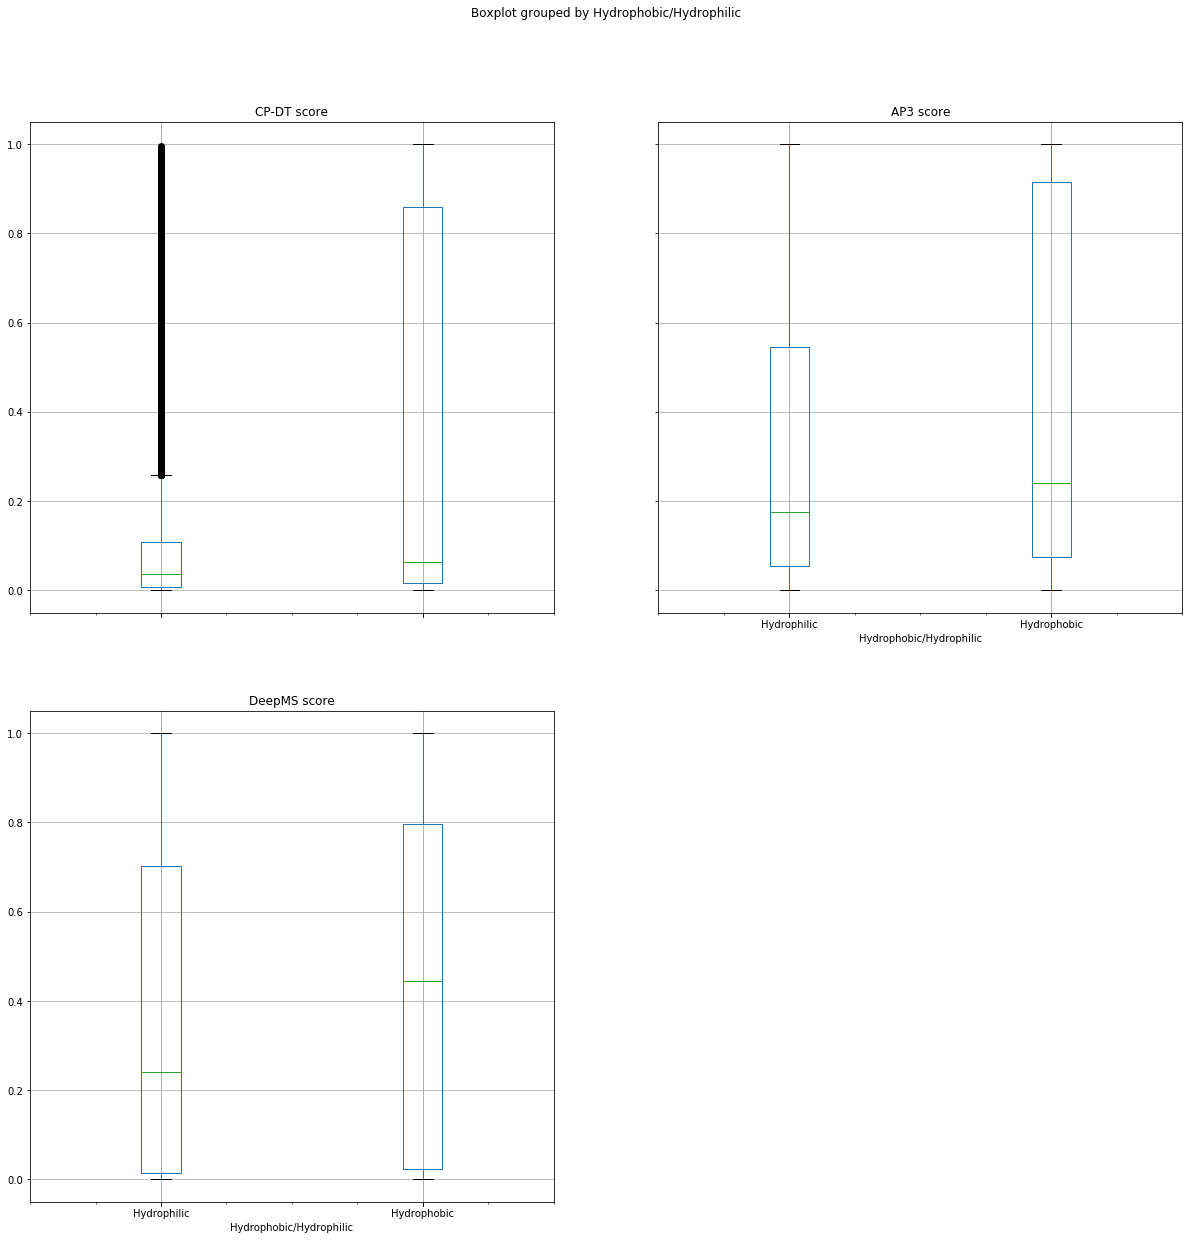

In [34]:
df_database_AA_8_30.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED4CE14C8>,
      dtype=object)

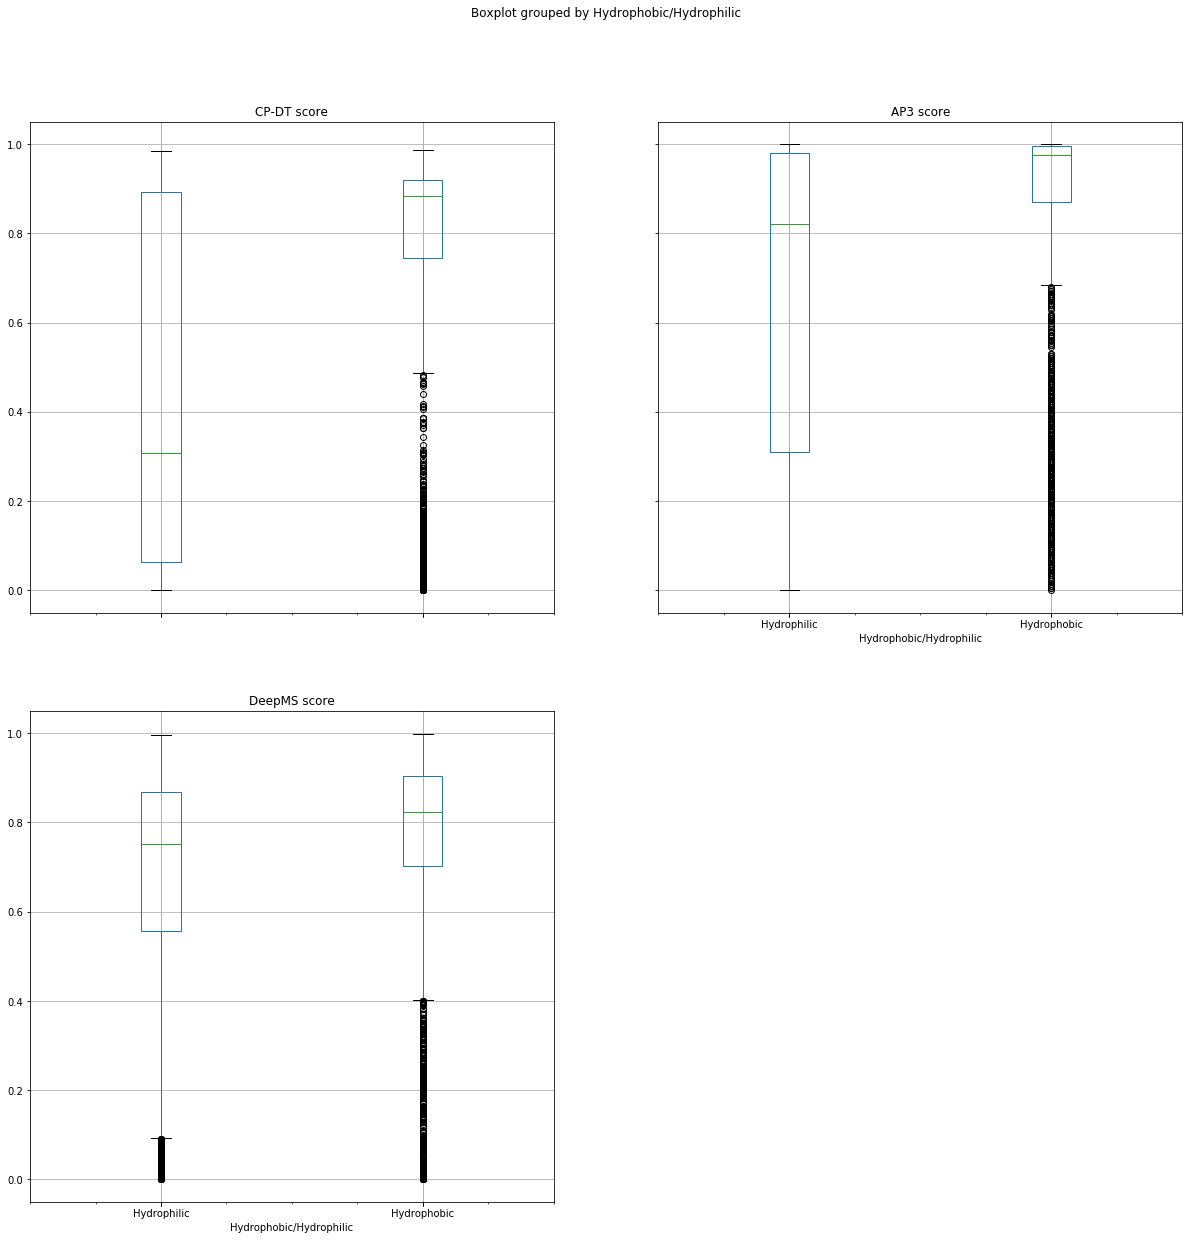

In [35]:
df_idenpep.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EC4BECAC8>,
      dtype=object)

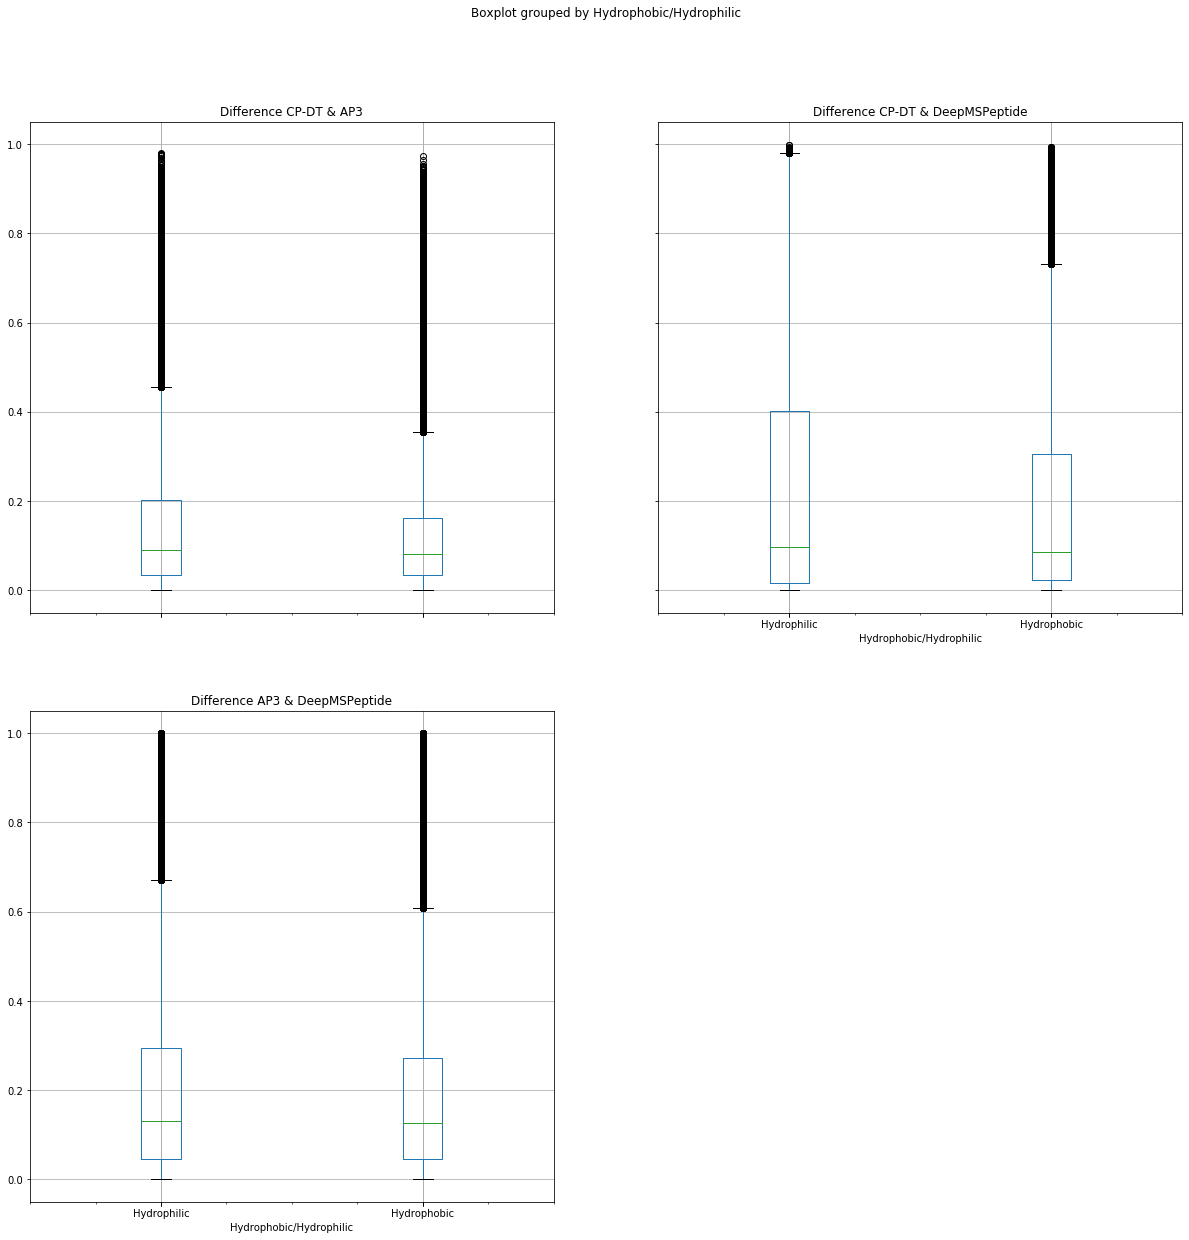

In [36]:
df_database_AA_8_30.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EC656E588>,
      dtype=object)

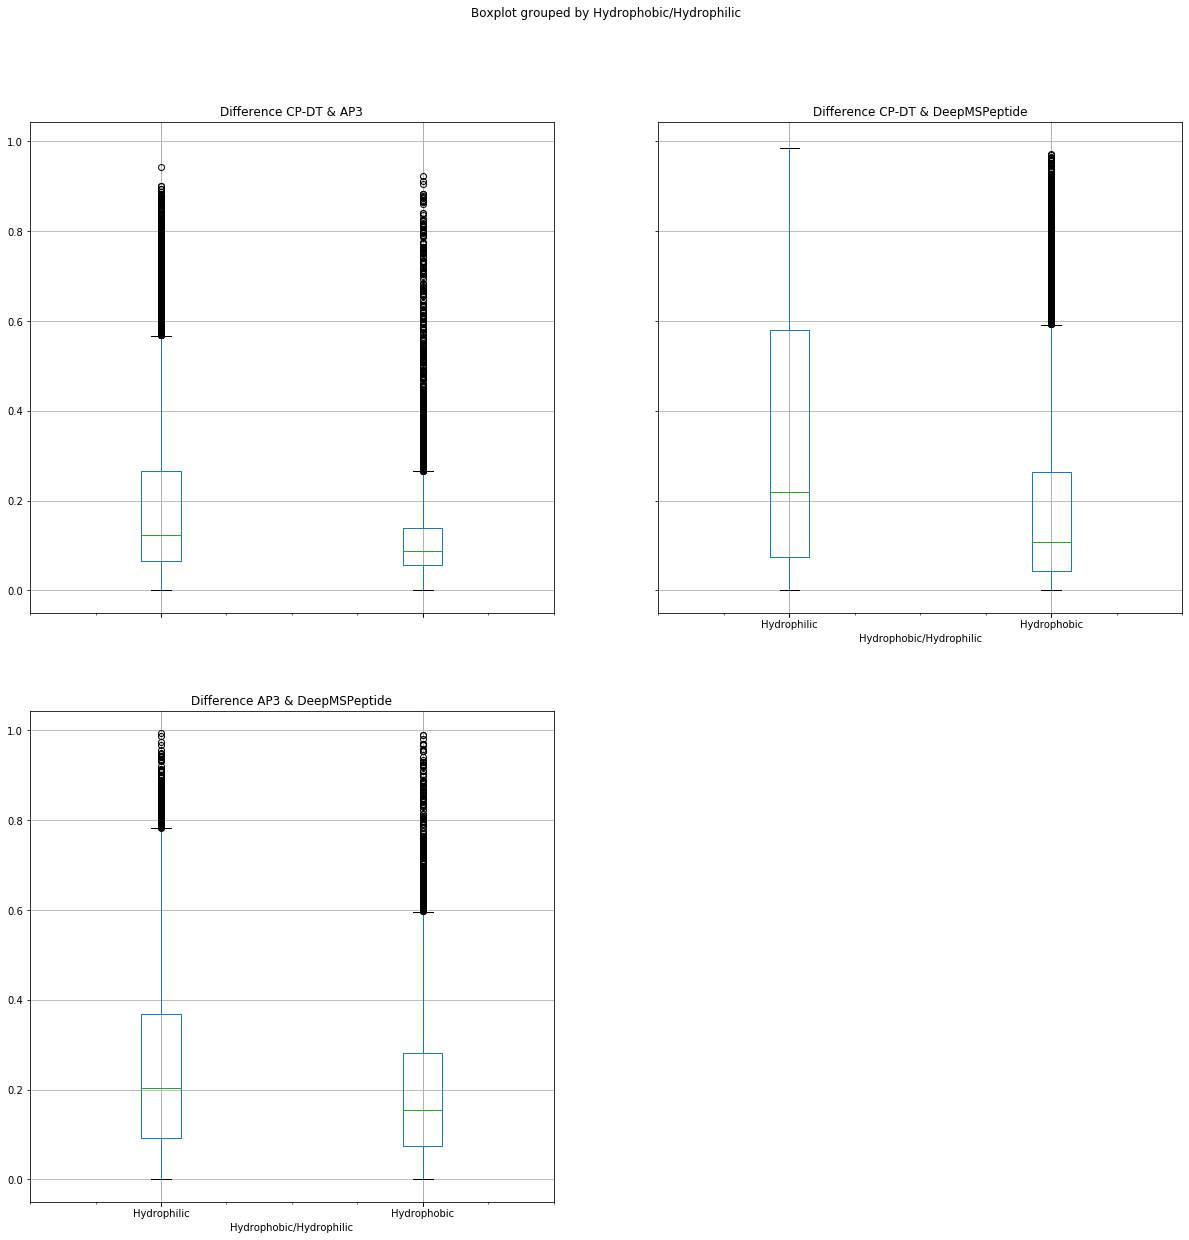

In [37]:
df_idenpep.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))